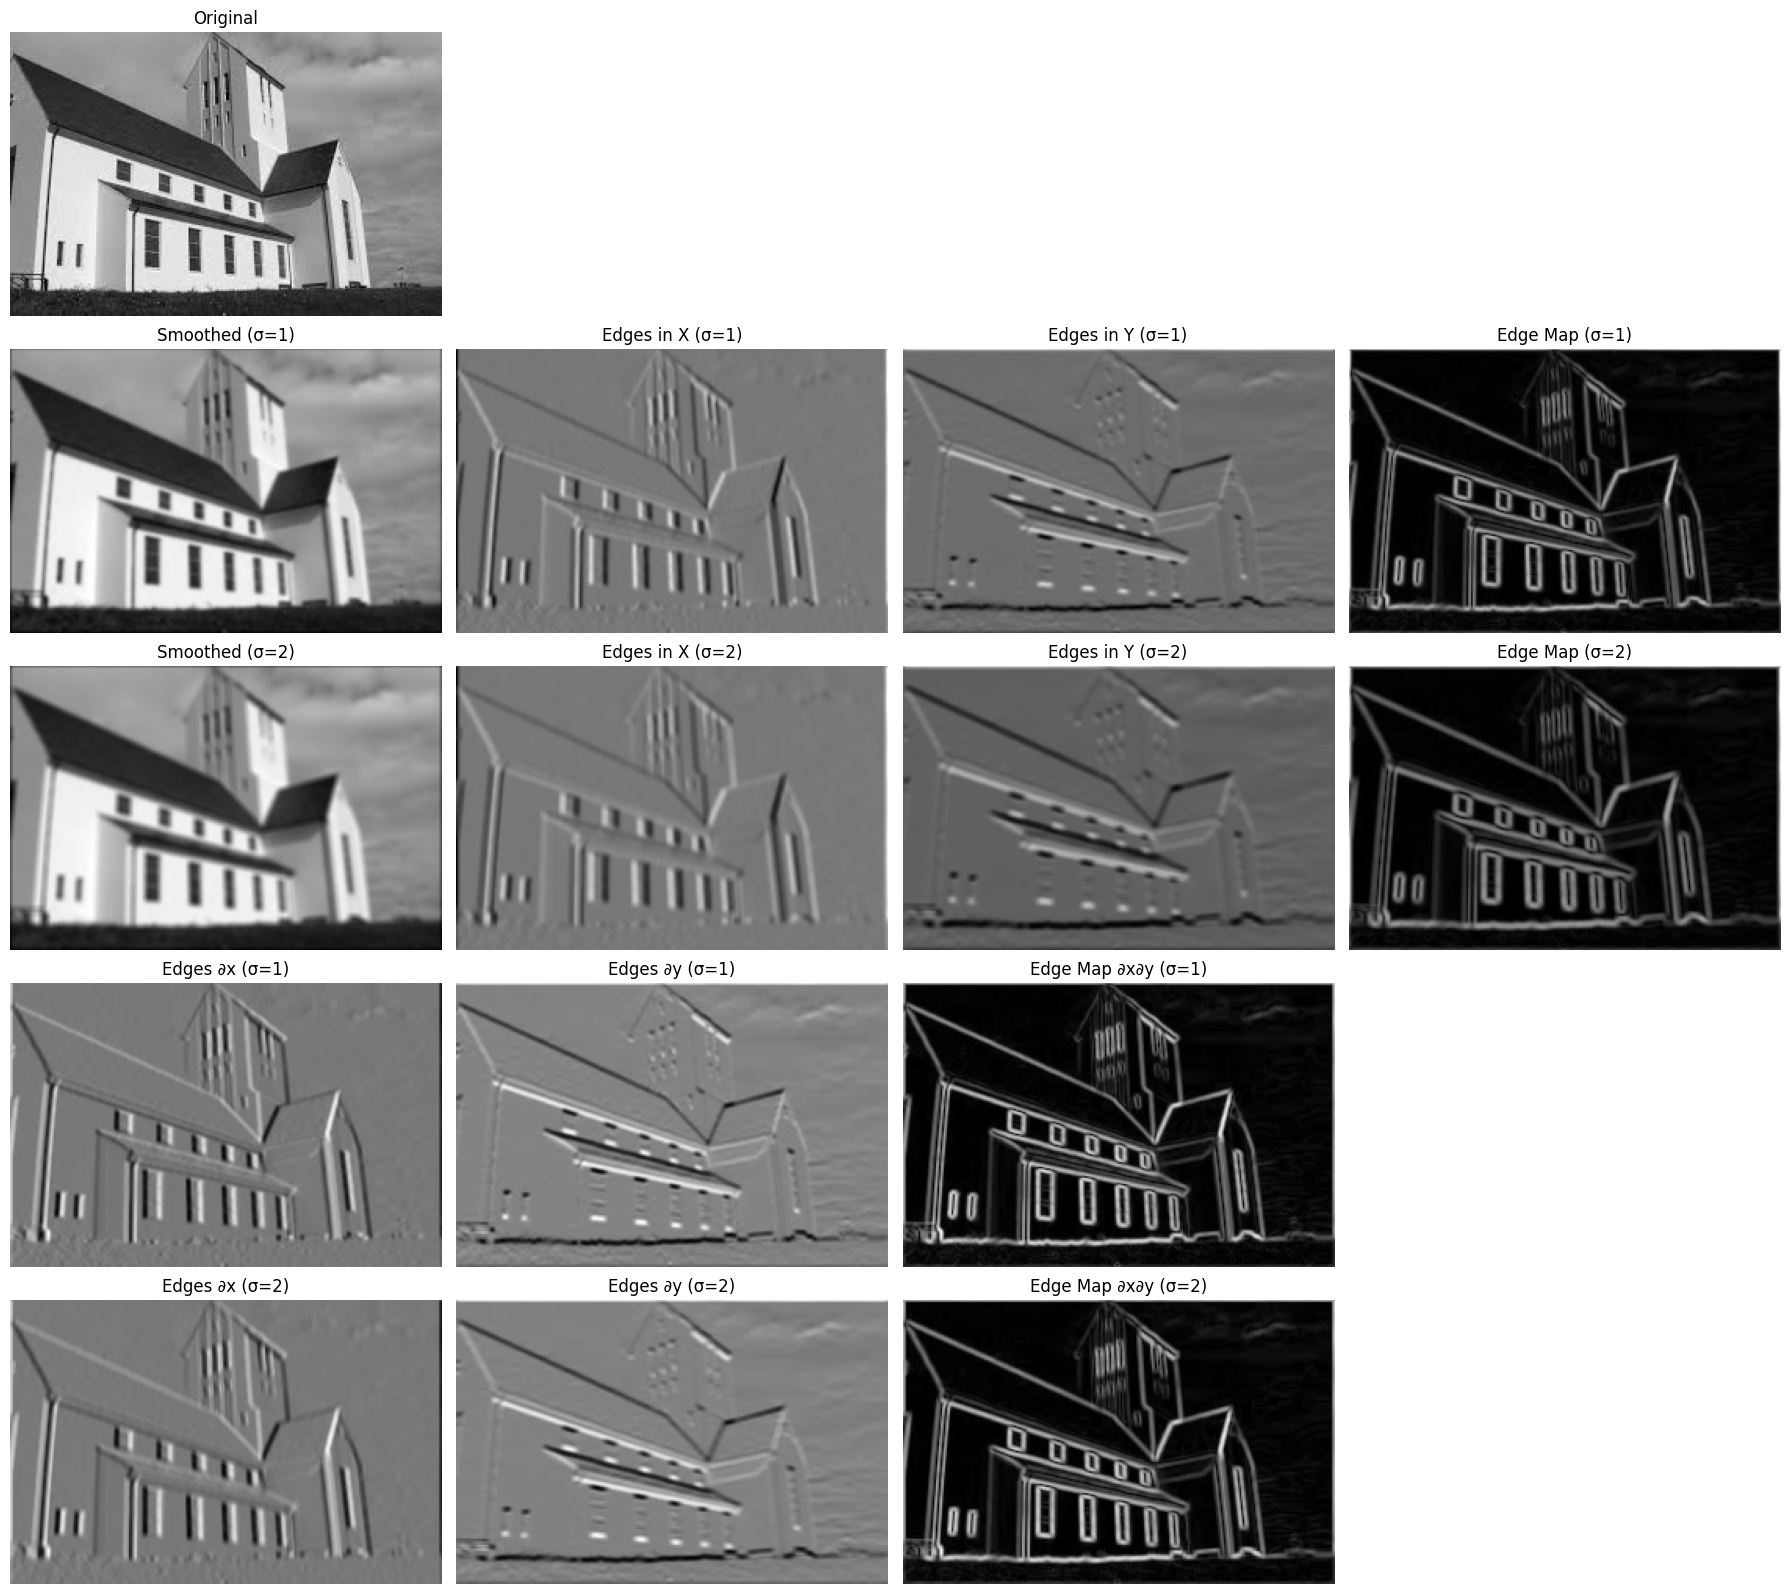

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# function to create a Gaussian Kernel
def gaussianKernel(size, sigma):
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-(size-1)/2)**2 + (y-(size-1)/2)**2) / (2*sigma**2)), (size, size))
    return kernel / np.sum(kernel)

# function to apply convolution
def applyConvolution(image, kernel):
    imgArray = np.asarray(image)
    return convolve2d(imgArray, kernel, mode='same', boundary='fill', fillvalue=0) 

# function for Sobel filter
def sobelFilter(image, kernel):
    return applyConvolution(image, kernel)

# function to create a gaussian gerivative kernel
def gaussian_derivative_kernel(size, sigma, axis):
    g = gaussianKernel(size, sigma)
    if axis == 'x':
        # derivative in x direction
        return np.gradient(g, axis=1)
    elif axis == 'y':
        # derivative in y direction
        return np.gradient(g, axis=0)



# load image and convert to grayscale
imagePath = 'image1.png'  
image = Image.open(imagePath).convert('L')

# gaussian kernels for sigma=1 and sigma=2
kernelSigma1 = gaussianKernel(5, 1)
kernelSigma2 = gaussianKernel(5, 2)

# apply convolution
smoothed1 = applyConvolution(image, kernelSigma1)
smoothed2 = applyConvolution(image, kernelSigma2)

# sobel Filters
Sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Sy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# apply Sobel filters to the smoothed images
edgesX1 = sobelFilter(smoothed1, Sx)
edgesY1 = sobelFilter(smoothed1, Sy)
edgesX2 =sobelFilter(smoothed2, Sx)
edgesY2 =sobelFilter(smoothed2, Sy)

# combine the edges to get the edge map
edgeMap1 = np.sqrt(edgesX1**2 + edgesY1**2)
edgeMap2 = np.sqrt(edgesX2**2 + edgesY2**2)

# applying Gaussian derivative filters
kernelDxSigma1 = gaussian_derivative_kernel(5, 1, 'x')
kernelDySigma1 = gaussian_derivative_kernel(5, 1, 'y')

kernelDxSigma2 = gaussian_derivative_kernel(5, 2, 'x')
kernelDySigma2 = gaussian_derivative_kernel(5, 2, 'y')

# convolve with guassian
edgesDx1 = applyConvolution(image, kernelDxSigma1)
edgesDy1 = applyConvolution(image, kernelDySigma1)

edgesDx2 = applyConvolution(image, kernelDxSigma2)
edgesDy2 = applyConvolution(image,kernelDySigma2)

# compute edge maps for Gaussian derivatives
edgeMapDxDy1 = np.sqrt(edgesDx1**2 +edgesDy1**2)
edgeMapDxDy2 = np.sqrt(edgesDx2**2 + edgesDy2**2)


# display the results
plt.figure(figsize=(18, 16))

# original image
plt.subplot(5, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')


# for sigma=1
plt.subplot(5, 4, 5)
plt.imshow(smoothed1, cmap='gray')
plt.title('Smoothed (σ=1)')
plt.axis('off')

plt.subplot(5, 4, 6)
plt.imshow(edgesX1, cmap='gray')
plt.title('Edges in X (σ=1)')
plt.axis('off')

plt.subplot(5, 4, 7)
plt.imshow(edgesY1, cmap='gray')
plt.title('Edges in Y (σ=1)')
plt.axis('off')

plt.subplot(5, 4, 8)
plt.imshow(edgeMap1, cmap='gray')
plt.title('Edge Map (σ=1)')
plt.axis('off')



# for sigma=2
plt.subplot(5, 4, 9)
plt.imshow(smoothed2, cmap='gray')
plt.title('Smoothed (σ=2)')
plt.axis('off')

plt.subplot(5, 4, 10)
plt.imshow(edgesX2, cmap='gray')
plt.title('Edges in X (σ=2)')
plt.axis('off')

plt.subplot(5, 4, 11)
plt.imshow(edgesY2, cmap='gray')
plt.title('Edges in Y (σ=2)')
plt.axis('off')

plt.subplot(5, 4, 12)
plt.imshow(edgeMap2, cmap='gray')
plt.title('Edge Map (σ=2)')
plt.axis('off')

# for sigma=1 with Gaussian Derivatives
plt.subplot(5, 4, 13)
plt.imshow(edgesDx1, cmap='gray')
plt.title('Edges ∂x (σ=1)')
plt.axis('off')

plt.subplot(5, 4, 14)
plt.imshow(edgesDy1, cmap='gray')
plt.title('Edges ∂y (σ=1)')
plt.axis('off')

plt.subplot(5, 4, 15)
plt.imshow(edgeMapDxDy1, cmap='gray')
plt.title('Edge Map ∂x∂y (σ=1)')
plt.axis('off')

# for sigma=2 with Gaussian Derivatives
plt.subplot(5, 4, 17)
plt.imshow(edgesDx2, cmap='gray')
plt.title('Edges ∂x (σ=2)')
plt.axis('off')

plt.subplot(5, 4, 18)
plt.imshow(edgesDy2, cmap='gray')
plt.title('Edges ∂y (σ=2)')
plt.axis('off')

plt.subplot(5, 4, 19)
plt.imshow(edgeMapDxDy2, cmap='gray')
plt.title('Edge Map ∂x∂y (σ=2)')
plt.axis('off')




plt.tight_layout()
plt.show()




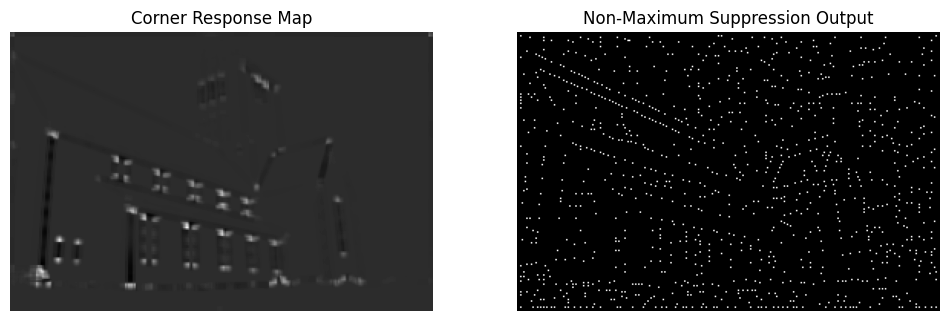

In [ ]:

def harris(imagePath, k=0.04, threshold=0.01):
    #convert to grayscale
    image = Image.open(imagePath).convert('L')
    image = np.array(image)

    #spatial derivative calculation
    sobelX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobelY = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    Ix = convolve2d(image, sobelX, mode='same')
    Iy = convolve2d(image, sobelY, mode='same')

    #Structure tensor setup (M)
    Ixx = Ix**2
    Ixy = Iy*Ix
    Iyy = Iy**2

    #gaussian
    window = np.ones((5, 5)) / 25

    Sxx = convolve2d(Ixx, window, mode='same')
    Sxy = convolve2d(Ixy, window, mode='same')
    Syy = convolve2d(Iyy, window, mode='same')+

    #Corner response calculation
    det = (Sxx * Syy) - (Sxy**2)
    trace = Sxx + Syy
    R = det - k * (trace**2)

    #Non-maximum suppression
    corners = np.zeros_like(R)
    for i in range(1, R.shape[0] - 1):
        for j in range(1, R.shape[1] - 1):
            if R[i, j] > threshold and R[i, j] == np.max(R[i-1:i+2, j-1:j+2]):
                corners[i, j] = 1

    return R, corners

#apply to image
cornerResponse, corners = harris("image1.png")

#plotting 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cornerResponse, cmap='gray')
plt.title('Corner Response Map')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(corners, cmap='gray')
plt.title('Non-Maximum Suppression Output')
plt.axis('off')

plt.show()
